In [1]:
import os, shutil
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
# 이전 버전의 텐서플로우, 케라스 설치

!pip install keras==2.3.1
!pip install tensorflow==2.2.0

import tensorflow as tf
import keras
tf.__version__, keras.__version__

In [ ]:
tf.__version__, keras.__version__

('2.8.0', '2.8.0')

# [4월 8일]
---

## # 작은 데이터셋 문제에서 딥러닝의 타당성
---
딥러닝은 데이터가 풍부할 때만 작동한다는 말을 이따금 듣습니다. 부분적으로는 맞습니다. 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것입니다. 이는 훈련 샘플이 많아야만 가능합니다. 입력 샘플이 이미지와 같이 매우 고차원인 문제에서는 특히 그렇습니다.

- 많은 샘플이 의미하는 것은 상대적
- 복잡한 문제를 푸는 컨브넷을 수십 개의 샘플만을 사용해서 훈련하는 것은 불가능
- 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용
- 매우 작은 이미지 데이터셋에서 어떤 종류의 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있다.

- 딥러닝 모델은 태생적으로 매우 다목적
- 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트 모델을 조금만 변경해서 완전히 다른 문제에 재사용
- 특히 컴퓨터 비전에서는 (보통 ImageNet 데이터셋에서 훈련된) 사전 훈련된 모델들이 다운로드받을 수 있도록 많이 공개되어 있어서 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있다.


## # 훈련, 검증, 테스트 폴더로 이미지 복사
---
- train 2000개
- validation 1000개
- test 1000개

In [ ]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉토리 경로
original_dataset_dir = '../data/cats_and_dogs'

# 소규모 데이터셋을 저장할 디렉토리
base_dir = '../data/cats_and_dogs_small'
# if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
#     shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉토리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
# 소규모 데이터셋을 저장할 디렉토리
base_dir = '/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/data/cats_and_dogs_small'

# 훈련, 검증, 테스트 분할을 위한 디렉토리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')

# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')

# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 테스트용 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')

# 테스트용 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## # 네트워크 구성
---

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

# 소규모 컨브넷 만들기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 모델 훈련 설정
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

## # 데이터 전처리
---
- 과대 적합 여부 확인
- 데이터 증식을 통한 네트워크의 성능 개선
- 사전 훈련된 네트워크를 활용

### # 제너레이터를 사용한 데이터에 모델을 훈련
---
- `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.
- 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다.
- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다. 
- `steps_per_epoch` 매개변수에서 이를 설정한다. 
- 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어간다.
- 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다.
- `fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있다. 
- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다.
- `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다.
- 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 한다.


In [ ]:
# ImageDataGenerator를 사용하여 디렉토리에서 이미지 읽기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # 타겟 디렉토리
        target_size = (150, 150), # 모든 이미지를 150 × 150 크기로 변경
        batch_size = 20,
        class_mode = 'binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 배치 제네레이터를 사용하여 모델 훈련

history = model.fit_generator(train_generator,
                              steps_per_epoch = 100, # batch_size
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50) # batch_size

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - 15s 133ms/step - loss: 0.6888 - acc: 0.5365 - val_loss: 0.6787 - val_acc: 0.5660
Epoch 2/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6458 - acc: 0.6255 - val_loss: 0.6471 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 13s 132ms/step - loss: 0.5932 - acc: 0.6765 - val_loss: 0.6032 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5588 - acc: 0.7105 - val_loss: 0.5857 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5287 - acc: 0.7375 - val_loss: 0.6094 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5069 - acc: 0.7390 - val_loss: 0.5918 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 13s 131ms/step - loss: 0.4826 - acc: 0.7605 - val_loss: 0.5669 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 13s 131ms/st

In [ ]:
# 모델 저장하기

model.save('/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/합성곱 신경망 (CNN)/cats_and_dogs_small_1.h5')

In [ ]:
# 모델 불러오기

from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/합성곱 신경망 (CNN)/cats_and_dogs_small_1.h5')

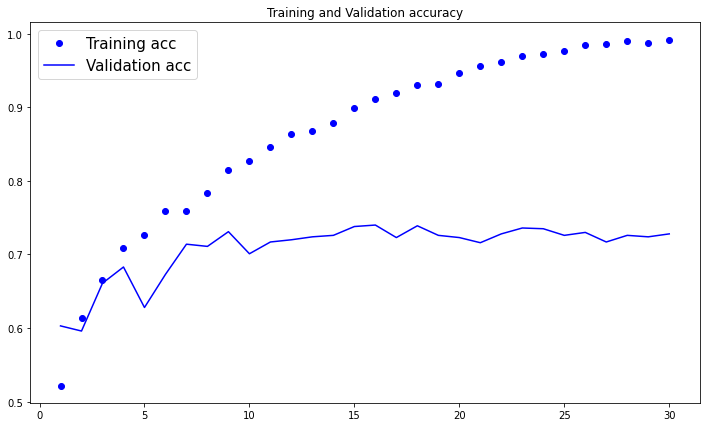

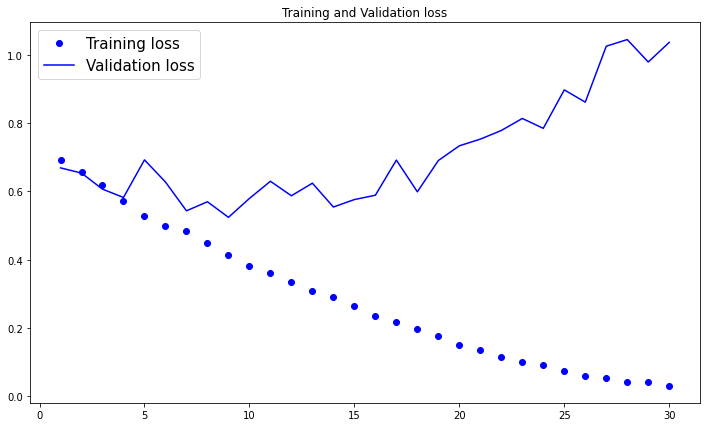

In [ ]:
# 훈련 정확도와 손실 그래프 그리기

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend(fontsize = 15)

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(fontsize = 15)
plt.show()

# [4월 11일]
---

## # 데이터 증식
---
- 참고 :  
https://ichi.pro/ko/keras-mich-tensorflowleul-sayonghan-imiji-deiteo-jeungdae-tamsaeg-184813206747204

In [ ]:
# 데이터 증식 설정

datagen = ImageDataGenerator(rotation_range = 20,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             shear_range = 0.1,
                             zoom_range = 0.1,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

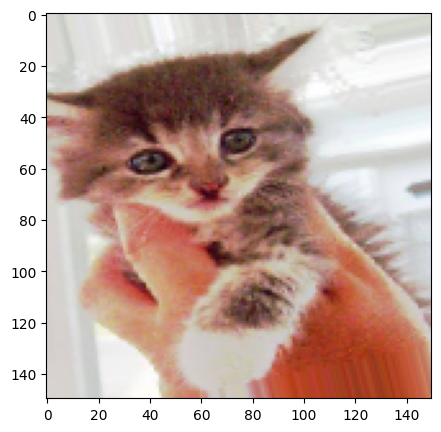

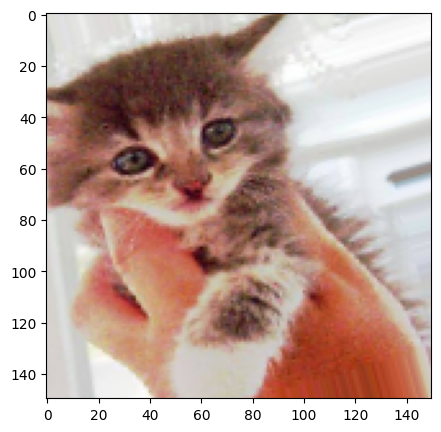

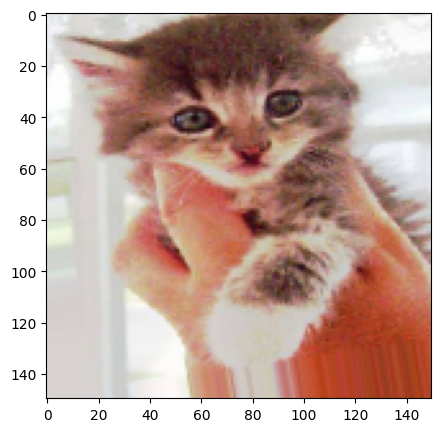

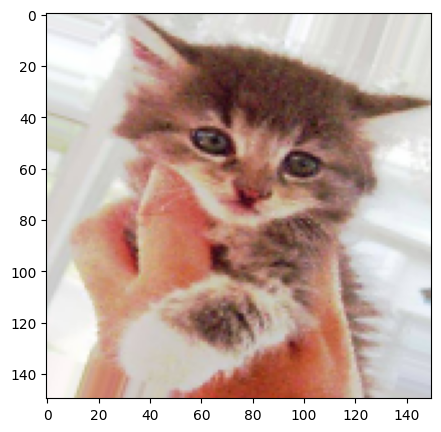

In [ ]:
# 랜덤하게 증식된 훈련 이미지 그리기

from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.style.use('default')
    plt.figure(figsize = (5, 5))
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


In [3]:
# 드롭아웃을 포함한 새로운 컨브넷

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

In [12]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

history = model.fit(train_generator,
                    epochs = 100,
                    validation_data = validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 209ms/step - loss: 0.3665 - acc: 0.8370 - val_loss: 0.4566 - val_acc: 0.8180
Epoch 2/100
100/100 [==============================] - 22s 219ms/step - loss: 0.3709 - acc: 0.8335 - val_loss: 0.3849 - val_acc: 0.8260
Epoch 3/100
100/100 [==============================] - 21s 208ms/step - loss: 0.3617 - acc: 0.8375 - val_loss: 0.4358 - val_acc: 0.8060
Epoch 4/100
100/100 [==============================] - 21s 211ms/step - loss: 0.3690 - acc: 0.8395 - val_loss: 0.3886 - val_acc: 0.8340
Epoch 5/100
100/100 [==============================] - 21s 211ms/step - loss: 0.3605 - acc: 0.8335 - val_loss: 0.3878 - val_acc: 0.8350
Epoch 6/100
100/100 [==============================] - 21s 207ms/step - loss: 0.3589 - acc: 0.8420 - val_loss: 0.4372 - val_acc: 0.8090
Epoch 7/100
100/100 [==============================] - 21s 210ms/step - loss: 0.3723 - acc: 0.8395 -

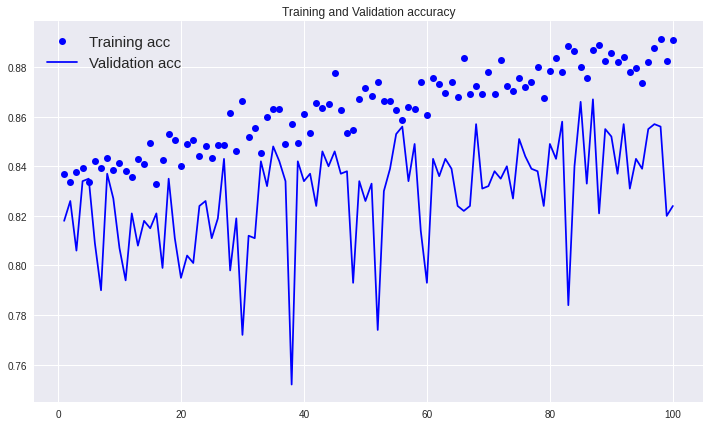

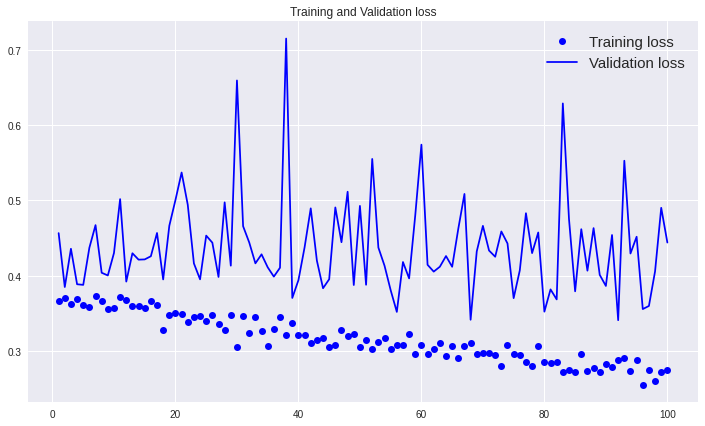

In [13]:
# 검증 시각화

plt.style.use('seaborn')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend(fontsize = 15)

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(fontsize = 15)
plt.show()

In [ ]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

history = model.fit(train_generator,
                    steps_per_epoch = 2000 // 32,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 1000 // 32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 22s 359ms/step - loss: 0.5204 - acc: 0.7398 - val_loss: 0.5272 - val_acc: 0.7440
Epoch 2/100
62/62 [==============================] - 22s 359ms/step - loss: 0.5186 - acc: 0.7403 - val_loss: 0.4695 - val_acc: 0.7680
Epoch 3/100
62/62 [==============================] - 23s 373ms/step - loss: 0.5135 - acc: 0.7464 - val_loss: 0.4974 - val_acc: 0.7540
Epoch 4/100
62/62 [==============================] - 22s 358ms/step - loss: 0.5153 - acc: 0.7515 - val_loss: 0.4833 - val_acc: 0.7690
Epoch 5/100
62/62 [==============================] - 22s 356ms/step - loss: 0.5049 - acc: 0.7566 - val_loss: 0.4649 - val_acc: 0.7760
Epoch 6/100
62/62 [==============================] - 22s 355ms/step - loss: 0.5077 - acc: 0.7490 - val_loss: 0.4885 - val_acc: 0.7510
Epoch 7/100
62/62 [==============================] - 22s 355ms/step - loss: 0.4827 - acc: 0.7602 - val_loss: 0.4

In [ ]:
# 모델 저장

model.save('/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/합성곱 신경망 (CNN)/cats_and_dogs_small_2.h5')

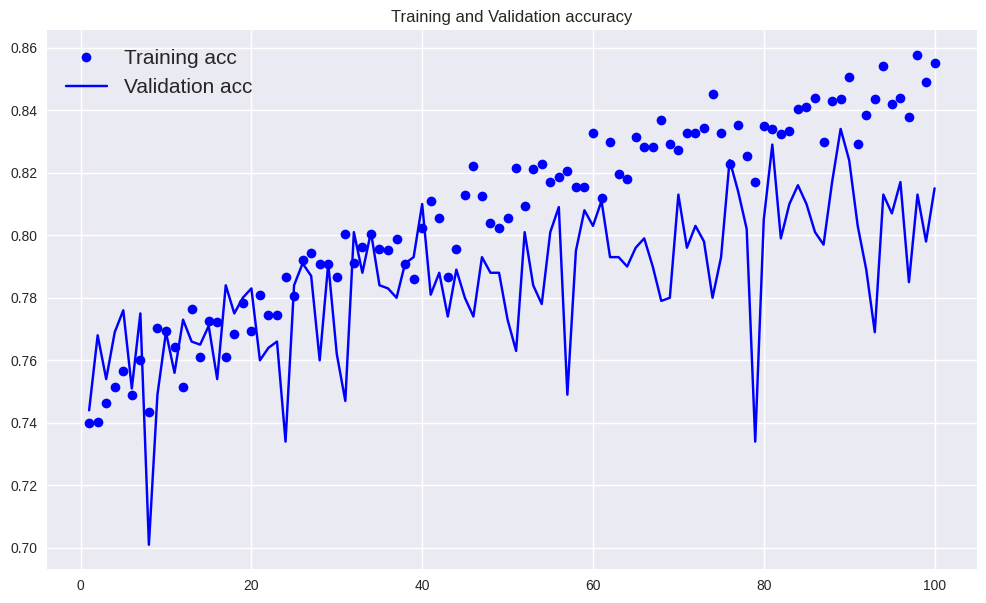

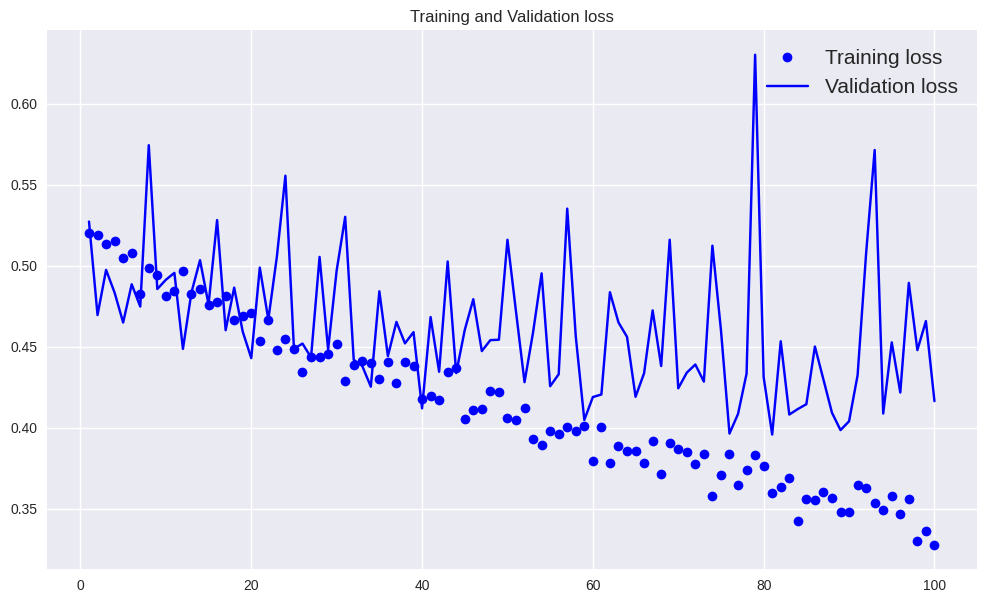

In [ ]:
# 검증 시각화

plt.style.use('seaborn')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend(fontsize = 15)

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(fontsize = 15)
plt.show()